In [115]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split, KFold, cross_validate
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import MinMaxScaler, StandardScaler

In [116]:
# Problem 1
# Reads labelled training data
df = pd.read_csv('/Users/Han/Downloads/diabetes.csv')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [117]:
x = df.values[:, :7]
y = df.values[:, 8]

In [118]:
# Performing minimum and maximum scaling
minMaxScaling = MinMaxScaler()
x = minMaxScaling.fit_transform(x)

# Performing standardization
standScaling = StandardScaler()
x = standScaling.fit_transform(x)

# Performing 80% and 20% split of the data into training and test sets
np.random.seed(0)
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.8, test_size=0.2, random_state=np.random)

# Performing logistic regression
lRegression = LogisticRegression()
lRegression.fit(x_train, y_train)
y_pred = lRegression.predict(x_test)

# Generating confusion matrix to evaluate the accuracy
conf_matrix = confusion_matrix(y_test, y_pred)
print(conf_matrix)

[[97 10]
 [19 28]]


In [119]:
# Evaluating the model using accuracy, precision, and recall evaluation metrics
print('Accuracy:', metrics.accuracy_score(y_test, y_pred))
print('Precision:', metrics.precision_score(y_test, y_pred))
print('Recall:', metrics.recall_score(y_test, y_pred))

Accuracy: 0.8116883116883117
Precision: 0.7368421052631579
Recall: 0.5957446808510638


Text(33.0, 0.5, 'Actual')

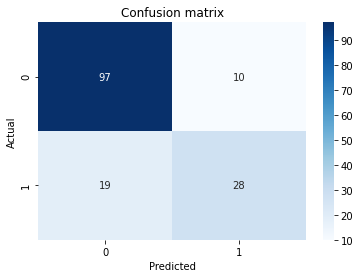

In [120]:
# Ploting the results of the binary classifier model
class_names = [0, 1]
tick_marks = np.arange(len(class_names))
plt.subplots()
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)

# Generates heat map
sns.heatmap(pd.DataFrame(conf_matrix), annot=True, cmap='Blues', fmt='g')
plt.title('Confusion matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')

In [121]:
# Problem 2
# Generating Gaussian Naive Bayes model
GauNB = GaussianNB()
GauNB.fit(x_train, y_train)
y_pred = GauNB.predict(x_test)

# Generating confusion matrix to evaluate the accuracy
conf_matrix = confusion_matrix(y_test, y_pred)
print(conf_matrix)

[[94 13]
 [19 28]]


In [122]:
# Evaluatinh model using accuracy, precision, and recall evaluation metrics
print('Accuracy:', metrics.accuracy_score(y_test, y_pred))
print('Precision:', metrics.precision_score(y_test, y_pred))
print('Recall:', metrics.recall_score(y_test, y_pred))

Accuracy: 0.7922077922077922
Precision: 0.6829268292682927
Recall: 0.5957446808510638


Text(33.0, 0.5, 'Actual class')

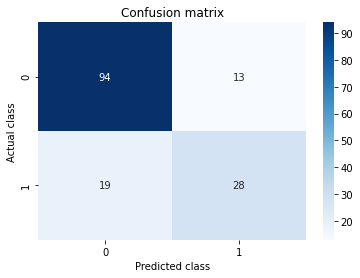

In [123]:
# Ploting the results of the binary classifier model
tick_marks = np.arange(len(class_names))
plt.subplots()
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)

# Generating heat map
sns.heatmap(pd.DataFrame(conf_matrix), annot=True, cmap='Blues', fmt='g')
plt.title('Confusion matrix')
plt.xlabel('Predicted class')
plt.ylabel('Actual class')

In [124]:
# Problem 3
# Performing K-fold cross-validation of logistic regression for K = 5 folds

metrics = ['accuracy', 'precision', 'recall']
crossV = KFold(n_splits=5, random_state=1, shuffle=True)
result = cross_validate(lRegression, x, y, scoring=metrics, cv=crossV, n_jobs=-1)

print('Accuracy:', result['test_accuracy'])
print('Precision:', result['test_precision'])
print('Recall:', result['test_recall'])

Accuracy: [0.77922078 0.74675325 0.77922078 0.79738562 0.73856209]
Precision: [0.75609756 0.68292683 0.72093023 0.74358974 0.69047619]
Recall: [0.56363636 0.51851852 0.58490566 0.58       0.51785714]


In [125]:
# Performing K-fold cross-validation of logistic regression for K = 10 folds

crossV = KFold(n_splits=10, random_state=1, shuffle=True)
result = cross_validate(lRegression, x, y, scoring=metrics, cv=crossV, n_jobs=-1)

print('Accuracy:', result['test_accuracy'])
print('Precision:', result['test_precision'])
print('Recall:', result['test_recall'])

Accuracy: [0.79220779 0.76623377 0.79220779 0.7012987  0.80519481 0.71428571
 0.85714286 0.75324675 0.72368421 0.76315789]
Precision: [0.7826087  0.72222222 0.81818182 0.52631579 0.81818182 0.54545455
 0.8        0.7        0.63157895 0.75      ]
Recall: [0.62068966 0.5        0.6        0.41666667 0.62068966 0.5
 0.69565217 0.51851852 0.46153846 0.6       ]


In [126]:
# Problem 4
# Performs K-fold cross-validation of Gaussian Naive Bayes model for K = 5 folds

crossV = KFold(n_splits=5, random_state=1, shuffle=True)
result = cross_validate(GauNB, x, y, scoring=metrics, cv=crossV, n_jobs=-1)

print('Accuracy:', result['test_accuracy'])
print('Precision:', result['test_precision'])
print('Recall:', result['test_recall'])

Accuracy: [0.79220779 0.73376623 0.73376623 0.78431373 0.75163399]
Precision: [0.75555556 0.63829787 0.63043478 0.68085106 0.70454545]
Recall: [0.61818182 0.55555556 0.54716981 0.64       0.55357143]


In [127]:
# Performs K-fold cross-validation of Gaussian Naive Bayes model for K = 10 folds

crossV = KFold(n_splits=10, random_state=1, shuffle=True)
result = cross_validate(GauNB, x, y, scoring=metrics, cv=crossV, n_jobs=-1)

print('Accuracy:', result['test_accuracy'])
print('Precision:', result['test_precision'])
print('Recall:', result['test_recall'])
plt.show()

Accuracy: [0.83116883 0.75324675 0.81818182 0.67532468 0.80519481 0.68831169
 0.81818182 0.77922078 0.76315789 0.72368421]
Precision: [0.83333333 0.65217391 0.80769231 0.47826087 0.79166667 0.5
 0.69565217 0.72727273 0.68181818 0.69565217]
Recall: [0.68965517 0.57692308 0.7        0.45833333 0.65517241 0.45833333
 0.69565217 0.59259259 0.57692308 0.53333333]
